<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Переименование столбцов</a></span></li><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Устранение-дубликатов" data-toc-modified-id="Устранение-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Устранение дубликатов</a></span></li></ul></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-параметров-и-обработка-аномалий" data-toc-modified-id="Анализ-параметров-и-обработка-аномалий-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ параметров и обработка аномалий</a></span></li><li><span><a href="#Анализ-сроков-продажи-квартир" data-toc-modified-id="Анализ-сроков-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ сроков продажи квартир</a></span></li><li><span><a href="#Анализ-факторов,-влияющих-на-общую-стоимость-жилья" data-toc-modified-id="Анализ-факторов,-влияющих-на-общую-стоимость-жилья-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализ факторов, влияющих на общую стоимость жилья</a></span></li><li><span><a href="#Анализ-стоимости-одного-квадратного-метра" data-toc-modified-id="Анализ-стоимости-одного-квадратного-метра-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ стоимости одного квадратного метра</a></span></li><li><span><a href="#Анализ-объектов-недвижимости-в-пределах-Санкт-Петербурга" data-toc-modified-id="Анализ-объектов-недвижимости-в-пределах-Санкт-Петербурга-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ объектов недвижимости в пределах Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

У нас есть данные сервиса по продаже недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Задача - научиться определять рыночную стоимость объектов недвижимости. Для этого необходимо провести исследовательский анализ данных и установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования**:  
1. Научиться определять рыночную стоимость объектов недвижимости.
2. Выявить параметры, влияющие на цену объектов недвижимости.


**Ход исследования**  
Так как данные из сервиса были предоставлены в "сыром" виде, то в первую очередь необходмо изучить их и провести этап предобработки - убрать по максимуму все критичные ошибки и пропуски, которые могут негативно повлиять на результаты исследования.

Исследовательский анализ пройдет в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.


## Обзор данных

In [1]:
#импортируем библиотеки pandas, matplotlib, numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#считываем данные из файла .csv в датафрейм и сохраняем датафрейм в переменную data 
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')

In [3]:
#анализируем датафрейм - для этого выводим первые 20 строк датафрейма
data.head(20)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


По выведенным на экран первым 20-и строкам датафрейма очевидно, что невозможно будет определить количество столбцов, тип данных в каждом столбце и колчиство строк в каждом столбце, так как данные 'слиплись' из-за разделителя **\t**. Для изучения датафрейма в корректном нужно применить параметр `sep`, который разделит колонки в датафрейме.

In [4]:
#убираем разделитель \
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [5]:
#анализируем датафрейм - для этого выводим первые 20 строк датафрейма
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
#выводим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итого, мы получили следующую информацию о датафрейме:
 - в датафрейме 22 колонки;
 - максимальное количество строк - 23699, но во всех колонках количество строк разнится - значит есть колонки с пропущенными значениями;
 - в колонках разные типы данных: 2 колонки с логическим типом данных (булевы значения), 14 колонок с вещественными числами (десятичная дробь), 3 колонки с целыми числами и 3 колонки, где тип данных - строки.

Из документации мы получили следующую информацию о столбцах:  

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  

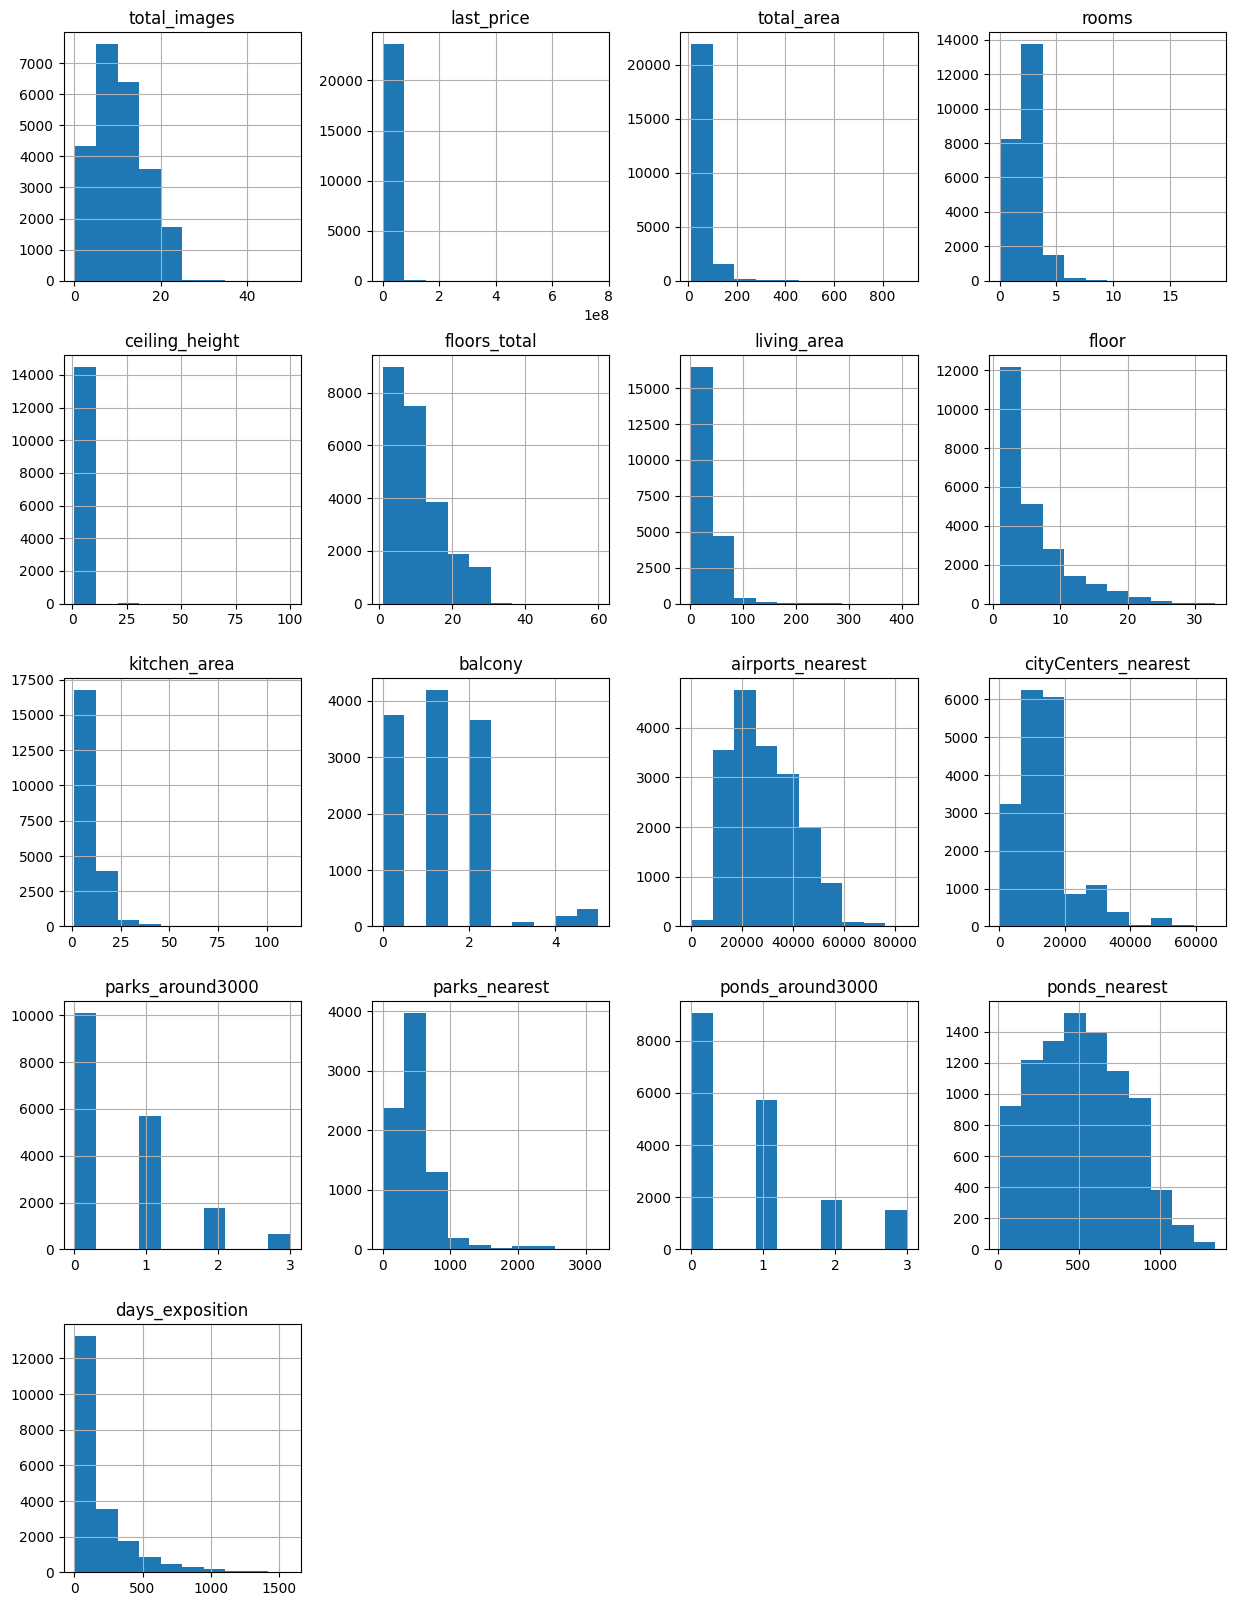

In [8]:
#построим гистограммы колонок с числовыми значениями

data.hist(figsize=(15, 20))
plt.show()

**Выводы**  
Данные содержат большое количество информации как непосредственно о каждом объекте недвижимости, так и о параметрах, которые потенциально могут влиять на стоимость каждого из них. Предварительно можно утверждать, что данных достаточно для проведения исследования.  

Но также по обзору первых 20-и строк датафрейма, по информации о таблице и по гистограммам видно, что прежде, чем приступать к исследованию, данные необходимо привести к нормальному виду. 

1. Некоторые значения в большом количестве колонок пропущены, причем в некоторых колонках пропущено более 50% значений. Их необходимо либо восстановить, заменив на наиболее релевантные значения, либо исключить из исследования.

2. В названиях некоторых колонок пристутствует нарушение стиля.

3. В нескольких колонках нужно изменить тип данных.

4. По гистограммам видно, что в некоторых колонках, например, в столбце `ceiling_height`, где указана высота потолка, значения достигают 100 метров. 

5. Помимо этого, данные требуется проверить на дубликаты и, если они присутствуют, то устранить их.  

*Прежде чем проводить исследование следующим этапом требуется решить проблемы с данными.*

## Предобработка данных

### Переименование столбцов

In [9]:
#выводим перечень названий столбцов таблицы data
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [10]:
#переименуем столбецы cityCenters_nearest, parks_around3000 и ponds_around3000'
#в соответствии с хорошим стилем
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around', \
'ponds_around3000': 'ponds_around'})

In [11]:
#проверяем названия колонок еще раз
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around', 'parks_nearest', 'ponds_around', 'ponds_nearest',
       'days_exposition'],
      dtype='object')

Прежде чем приступить к дальнейшей работе с датафреймом, все названия колонок были преведены к правильному стилю для удобства работы с колонками. 

- Колонка `cityCenters_nearest` сочетала в себе смешение стилей camel и snake и была переименована в соответствии с наиболее корректным для назаваний колонок стилем snake.
- Кололонки `parks_around3000` и `ponds_around3000` также были переименованы, из названий было убрано окончание '3000', чтобы оптимизировать работу с датафреймом, а также место на компьютере, так как в документации уже есть пояснение о том, что в этих столбцах подразумевается радиус до 3 км.

### Обработка пропущенных значений

In [12]:
#подсчет пропусков в таблице
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around             5518
parks_nearest           15620
ponds_around             5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
#посчитаем долю пропущенных значений в каждом столбце в процентном соотношении
data.isna().sum() / len(data) * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around            23.283683
parks_nearest           65.909954
ponds_around            23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Из общего числа колонок (22) найдены **14 колонок с пропущенными значениями** в датафрейме.

4 колонки содержат *менее 10% пропусков*, что в целом допустимо и не критично скажется на результатах исследования, если заменить значения предполагаемыми:  
`floors_total` - 86 пропусков = 0.3%  
`living_area` - 1903 пропусков = 8%  
`kitchen_area` - 2278 пропусков = 9.6%  
`locality_name` - 49 пропусков = 0.2%  

Но в 10 столбцах содержатся *более 10% пропусков*, а в некоторых из них *более 50%*, например, в `is_apartment`, `parks_nearest`, `ponds_nearest`, что однозначно негативно может повдиять на результаты аналитического анализа. По возможности от пропусков в данных столбцах необходимо максимально избавиться:  
`ceiling_height` - 9195 пропусков = 38.7%  
`is_apartment` - 20924 пропусков = 88.2%  
`balcony` - 11519 пропусков = 48.6%  
`airports_nearest` - 5542 пропусков = 23.3%  
`city_centers_nearest` - 5519 пропусков = 23.2%  
`parks_around` - 5518 пропусков = 23.2%  
`parks_nearest` - 15620 пропусков = 65.9%  
`ponds_around` - 5518 пропусков = 23.2%  
`ponds_nearest` - 14589 пропусков = 61.5%  
`days_exposition` - 3181 пропусков = 13.4%  

**Колонки, в которых пропуски все же останутся, нужно взять во внимание при дальнейшем исследовании.**

Избавимся от пропущенных значений в столбце `is_apartment` - заменим пропуски на False, так как предположительно большое количество пропусков в данном столбце возникло по причине того, что пользователи, которые замещали объявление, намеренно пропустили и не заполнили этот пункт, так как их объект недвижимости не отновится к апартаментам. Более того, статистически апартаментов действительно в разы меньше, чем квартир.

In [14]:
#заменяем пропуски в столбце is_apartment на False
data['is_apartment'] = data['is_apartment'].fillna(False)

Заменим пропуски в колонках `balcony`, `parks_around` и `ponds_around` на нулевое значение, так как, вероятно, пропуски пользователи в данных параментрах оставили по причине того, что в их объектах недвижимости отсутствуют балконы, а также в радиусе 3км нет парков и водоёмов. У последних двух параметров одинаковое количество пропусков - скорее всего эти пропуски относятся к одни и тем же домам, вокруг которых действительно нет парков и водоёмов.

In [15]:
#создадим цикл для замены пропущенных значений в колонках balcony, parks_around и ponds_around на ноль

columns_to_replace = ['balcony', 'parks_around', 'ponds_around']

for column in columns_to_replace:
    data[column] = data[column].fillna(0)

Удалим строки с пропущенными значениями в колонке с названиями населенных пунктов `locality_name`, так как мы не сможем восстановить названия населенных пунктов. Всего пропусков в этой колонке 49, это не скажется на дальнейшем исследовании.

In [16]:
#удаляем строки
data.dropna(subset=['locality_name'], inplace=True)

В колонке с общим количеством этажей в здании `floors_total` заменим пропуски медианным значением. 
Это целесообразная замена пропусков в данном случае, тем более пропусков не так много - всего 86, это не скажется негативно на последующих расчетах.

In [17]:
#сначала проверим список характерных значений
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Медианное значение по количеству этаже - 9, им мы заменим пропуски. Видно, что есть стандартное отклонение, то есть присутствуют аномально высокие значения (об этом говорит максимальное количество этажей - 60). Но количество этажей в промежутке между 1 и 3 квартилем - от 5 до 16, поэтому замена пропусков медианным значением 9 в данном случае - самое верное решение, с учетом крайне небольшого количества пропусков.  
НО! Важно учесть одно условие при замене: если при замене значения этажа медианой окажется, что медиана больше значения общего количества этажей, указанного в колонке `floors_total`, то дополнительно проведем замену подобных некорректных значений на значение последнего этажа, равное значению в колонке `floors_total`.

In [18]:
#заменим пропущенные значения в колонке floors_total на медиану
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [19]:
#создаем цикл для замены значений этажа в тех строках, где после замены медианой, общее количество этажей 
#оказалось меньше медианного значения этажа, на котором располагается квартира
for floor in data['floor']:
    data.loc[(data['floor'] == floor) & (data['floors_total'] < data['floor']), 'floors_total'] = data['floor']


In [20]:
#еще раз посмотрим на список характеристик
data['floors_total'].describe()

count    23650.000000
mean        10.680803
std          6.589013
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

После замены пропусков медианой характерные значения по общему количеству этажей в здании не поменялись. Решение о замене медианой было верным.

Избавимся от пропусков в столбце `ceiling_height` - высота потолков. Общеизвестный факт, что минимальная высота потолка считается **2.4м**, средняя высота - **от 2.5 до 2.7**, в некоторых домах, например, сталинках высота потолка достигается **3-3.5м**. Для заполнения пропусков будем отталкиваться от этих значений, а также проверим, что нам говорят известные данные в колонке, в том числе какое медианное значение.

In [21]:
#посмотрим список характерных значений колонки ceiling_height
data['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Медианное значение высоты потолка - 2.6м, при этом мы видим, что есть аномальные значения: высота потолка у некоторых объектов 1м и 100м. Но значение стандартного отклонения не очень большое, значит аномалий не так много (их мы обработаем далее в ходе исследования). Также высота потолков в промежутек между 1 и 3 квартилем от 2.5м до 2.8м, что соответствует средней высоте потолков в России. Поэтому рационально будет заполнить пропуски медианным значением - 2.6м.

In [22]:
#заменяем пропуски медианой
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [23]:
#посмотрим еще раз на изменение характерных значений колонки ceiling_height
data['ceiling_height'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Произошли некоторые изменения характеристик после заполнения пропусков, что ожидаемо, так как пропуски в столбце `ceiling_height` составляли почти 39% от общего количества:  
*1. Значение 1 квартиля поменялось с 2.5м на 2.6м*  
*2. Значение 3 квартиля поменялось с 2.8м на 2.7м*  
*3. Соответственно ниже стало числовое значение стандартного отклонения - 0.9 вместо 1.2*  

В целом изменения не критичные и не скажутся негативно на дальнейшем анализе.

Далее заполним пропуски в столбце `living_area` - это жилая площадь квартиры в квадратных метрах. **В жилую площадь входят, например, гостиная, спальня, детская**, но сюда **не относятся: кухня, санузлы, коридор, кладовые и гардеробные, а также балконы и лоджии**. Логично будет заполнить пропуски в данной колонке медианными значениями, но не общей медианой, а разделив объекты недвижимости на группы, исходя из количества комнат, после чего найдем по каждой категории медиану и заменим ей пропуски в строках с соответствующим количеством комнат.  

Для начала выведем и посмотрим на характерные значения в столбце `living_area` до того, как заполним пропуски:

In [24]:
data['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [25]:
#создаем цикл замены пропусков в колонке living_area, используя логическую индексацию
for number in data['rooms'].unique():
    data.loc[(data['rooms'] == number) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == number), 'living_area'].median()

Снова выведем характерные значения столбца `living_area`, чтобы проверить, не исказились ли данные 
после замены пропусков медианами:

In [26]:
  data['living_area'].describe()

count    23650.000000
mean        34.313891
std         21.709506
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

В характерных значениях появились малоощутимые изменения, на несколько десятых поменялись: среднее значение, стандартное отклонение, показатель первого квартиля, показатель третьего квартиля и медиана.
Это абсолютно не критичные изменения.

Заменим пропуски значений в колонке, где указана площадь кухни - `kitchen_area`.
Начнем с квартир-студий. Так как жилая площадь студии равна суммарной (общей) площади минус квадратные метры санузла, значит, площадь кухни считается жилой и должна быть равна 0.

In [27]:
#выведем на экран характерные значения до того, как начнем заполнять пропуски
data['kitchen_area'].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [28]:
#заменяем пропуски площади кухни в квартирах-студиях на 0
data.loc[(data['studio'] == True) & (data['kitchen_area'].isna())] = 0

В оставшихся объектах с пропусками площади кухни мы можем заменить значения на медианные, исходя из группировки по количеству комнат в квартире, как делали это с заполнением пропусков в колонке с жилой площадью `living_area`.

In [29]:
#создаем цикл для замены пропусков в kitchen_area
for number in data['rooms'].unique():
    data.loc[(data['rooms'] == number) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == number), 'kitchen_area'].median()

In [30]:
data['kitchen_area'].describe()

count    23650.000000
mean        10.369138
std          5.721845
min          0.000000
25%          7.200000
50%          9.010000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

Как и в случае с колонкой `living_area`, изменения в колонке `kitchen_area` в среднем значении, стандартном отклоненим, показателе первого квартиля, показатель третьего квартиля и медиане совсем незначительные и не критичные. Изменился также минимальный показатель площади кухни с 1.3 на 0, так как мы присвоили площадь кухни 0 студиям с пропусками в колонке `kitchen_area`.

Обработаем пропуски в колонке `days_exposition` - сколько дней было размещено объявление от публикации до снятия. В колонке немало пропущенных значений - 3181, значит в пропусках кроется какая-либо причина. Можем предположить, что пользователи, которые разместили объявления, закрыли сделку, но забыли снять объявление с публикации. Или объект недвижимости так и не был продан, и пользователи не удалили объявление. Таким объявлением можем присвоить условное значение 9999, означающее, что объявление еще не снято с публикации.

In [31]:
#заменяем пропуски на 9999
data['days_exposition'] = data['days_exposition'].fillna(9999)

In [32]:
#проверим заполненные пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5477
city_centers_nearest     5454
parks_around                0
parks_nearest           15458
ponds_around                0
ponds_nearest           14467
days_exposition             0
dtype: int64

**Выводы**  

Из 14 колонок, в которых содержались пропуски показателей, мы заполнили 9:  

- `floors_total` - заменили медианным значением и частично значениями, равными общему количеству этажей - `floors_total`. Пропусков крайне мало в этой колонке. Причина пропусков - человеческий фактор, например, забыли заполнить или не знали количества этажей в доме, так как данный раздел заполняется пользователем.  
- `living_area` - сгрупировали объекты недвижимости по количеству комнат в квартире, нашли по каждой группе медиану и ей заменили пропуск в соответствующей группе.  
- `kitchen_area` - пропуски заменили аналогично, как и в колонке `living_area`.  

Пропуски в `living_area` и `kitchen_area` могли возникнуть по причине того, что пользователи не знали отдельно размер жилой площади и кухни или, например, в случае со студиями пользователи пропустили параметр площадь кухни, так как в студиях такого параметра нет. Также пользователи могли не знать, что конкретно относится к жилой площади и пропустили заполнение данного параметра, оставив только общую площадь.  
- `locality_name` - удалили строки с пропусками в этой колонке, так как пропусков очень мало, а возможности определить локацию нет. Можно предположить, что причиной возникновения пропусков является отсутствие локации в списке предложенном пользователю при заполнении.
- `ceiling_height` - заменили пропуски медианным значением, так как оно входит в общепринятую норму высоты потолкой в среднем по России от 2.5м до 2.7м.  
- `is_apartment` - пропуски заменили на False, так как, очевидно, пользователи намеренно пропустили этот пункт ввиду того, что из объект недвижимости не относится к апартаментам.
- `balcony` - пропуски заменили на 0, пользоватли скорее всего пропустили этот пункт, так как в их квартирах нет балконов.
- `parks_around` и `ponds_around` - заменили пропуски на 0, так как в радиусе 3км от объекта недвижимости скорее всего нет парков и кводоёмов, поэтому параметр не был заполнен. Данные в этих столбцах заполнялись автоматически без участия пользователя и пропусков обинаковое количество в обоих столбцах, поэтому можем предположить, что в системе, которая определяла количество парков и водоемов в определенных локациях, происходила ошибка.  
- `days_exposition` - заменили пропуски на условное обозначение 9999, так как предположительно пропуски появились из-за того, что объявления не были сняты с публикации пользователями по какой-либо причине.

**Колонки `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest`.
пока оставляем с пропусками, так как нет альтернативных решений по заполнению пропусков в этих столбцах.**
Так как данные в этих столбцах заполнялись автоматически геосервисом, то вероятнее всего пропуски из-за ошибки в определении геолокации сервисом.

### Изменение типов данных

In [33]:
#еще раз взгляем на общую информацию, чтобы изучить типы данных в каждой колонке
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  object 
 11  open_plan             23650 non-null  object 
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Из информации о таблица видно, что колонки `floors_total`, `balcony, parks_around`, `ponds_around` и `last_price` нужно перевести к целому числу - *int*; колонки `is_apartment`, `studio` и `open_plan` необходимо перевести к булевому типу - *bool*; а столбец `first_day_exposition` нужно перевести в тип данных дата-время - *datetime*.  

Изначально столбцы `studio` и `open_plan` были с типом данных *bool*, вероятно, при заполнении пропущенных значений формат изменился ошибочно на строки, так как значения False и True распознались как строковые. Аналогично в колонке `is_apartment`.

In [34]:
#изменим в колонках is_apartment, studio и open_plan тип данных на bool
data[['is_apartment', 'studio', 'open_plan']] = data[['is_apartment', 'studio', 'open_plan']].astype('bool')

Столбцы `floors_total`, `balcony, parks_around`, `ponds_around` и `last_price` имеют целочисленные показатели и, чтобы удобнее в дальнейшем было с ними работать, приведем их показатели к целому числу.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [36]:
#изменим в колонках floors_total, balcony, parks_around, ponds_around, floors_total и last_price тип данных 
#на целочисленное значение
data[['balcony', 'parks_around', 'ponds_around', 'floors_total', 'last_price']] = \
data[['balcony', 'parks_around', 'ponds_around', 'floors_total', 'last_price']].astype('int')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  int64  
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  int64  
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Формат колонок даты-времени из файла с данными всегда выгружается в 'кривом' формате, с которым невозможно работать, и с типом данныз object. Чтобы производить арифметические операции с датой и временем, нужно изменить формат колонки, и по стандарту привести к специальному типу данных, созднному для даты и времени - *datetime*.  
Так мы и поступим с колонкой `first_day_exposition`.

In [38]:
#изменение типа данных в колонке first_day_exposition на объекты datetime вместо строк object
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [39]:
#еще раз взглянем на общую информацию, чтобы убедиться, что тип данных поменялся
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

### Устранение дубликатов

In [40]:
#проверяем наличие и количество явных дубликатов
data.duplicated().sum()

148

In [41]:
#посмотрим на таблицу с явными дубликатами
data_dubl = data[data.duplicated()].tail(5)
data_dubl

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
22867,0,0,0.0,1970-01-01,0,0.0,0,0.0,0,False,False,False,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0.0
22877,0,0,0.0,1970-01-01,0,0.0,0,0.0,0,False,False,False,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0.0
23210,0,0,0.0,1970-01-01,0,0.0,0,0.0,0,False,False,False,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0.0
23554,0,0,0.0,1970-01-01,0,0.0,0,0.0,0,False,False,False,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0.0
23637,0,0,0.0,1970-01-01,0,0.0,0,0.0,0,False,False,False,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0.0


In [42]:
#удалим явные дубликаты и обновим индексацию
data = data.drop_duplicates().reset_index(drop=True)

Так как таблица с нулевыми значениями во всех колонках и указана минимальная дата по unix time 1970-01-01, то скорее всего явные дубликаты в таблице возникли в результате какого-то сбоя в системе.

Проверим наличие неявных дубликатов и исправим их. Из всей теблица невяные дубликаты могут скрываться только в столбце `locality_name`, где указаны названия населенных пунктов, в котрых располагаются объекты недвижимости.

In [43]:
#посмотрим на список уникальных значений в колонке locality_name
data_unique = data['locality_name'].unique()
data_unique

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 0, 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово'

Визуально посмотрев и проанализировав список названий населенных пунктов можно заменить следующие значения для избавления от неявных дубликатов:  

- заменить букву **'ё' на букву 'е'**, так как слово поселок пишется с разными буквами в списке, из-за чего могут быть задублированы названия одного и тогоже поселка;
- заменить в наименованиях, в которых присутствуют типы поселений 'городской поселок' и 'поселок станции', на **'поселок городского типа' и 'поселок при железнодорожной станции'**, так как аналогично, как и с поселком, типы поселения абсолютно идентичные, разница только в пропущенных словах, но одни и те же названия могут быть задублированны из-за разница написания типов поселений;
- заменить **деревня Кудрово на Кудрово (город)**. До 2018 года Кудрово было деревней и только в 2018 году деревня получила статус города. Пользователи скорее всего указывали старое название при размещении объявлений.


In [44]:
#приводим написание неявных дубликатов к единому
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace('городской поселок', 'поселок городского типа', regex=True)
    .replace('поселок станции', 'поселок при железнодорожной станции', regex=True)
    .replace('деревня Кудрово', 'Кудрово', regex=True)
) 

In [45]:
#появилось одно пропущенное значение, удалим строку с ним
print(data.isna().sum())
print()
data.dropna(subset=['locality_name'], inplace=True)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               1
airports_nearest         5477
city_centers_nearest     5454
parks_around                0
parks_nearest           15458
ponds_around                0
ponds_nearest           14467
days_exposition             0
dtype: int64



**Вывод**  

Возможно разность написания букв е и ё и наименований поселений связана с тем, что в сервисе не предлагалась выборка локации по первым буквам названия локации, а пользователи самостоятельно указывали её и писали каждый по-своему.  

***В качестве рекомендации разработчикам - можно предлагать пользователям название локации в выпадающих строках по введенным первым буквам в поле.***


## Добавление новых столбцов

Добавим новые колонки к текущем датафрейму для дальнейшего анализа стоимости объектов недвижимости.  

1. Для начала создадим колонку с ценой за один квадратный метр - `one_sq_meter_price`. Для того, чтобы найти стоимость одного м2 по каждому объекту, нужно разделить стоимость объекта недвижимости на его общую площадь.

In [46]:
#создаем колонку с ценой за 1 м2, округляем значение до 2 знаков после запятой
data['one_sq_meter_price'] = (data['last_price'] / data['total_area']).round(2)

2. Создадим колонку с днями недели публикации объявления - `days_of_week`, где 0 — это понедельник, 1 — вторник и так далее. 

In [47]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

3. Создим столбец `exposition_month`, в ктором будет указываться месяц публикации объявления.

In [48]:
data['exposition_month'] = data['first_day_exposition'].dt.month

4. Создадим столбец `exposition_year`, в ктором будет указан год публикации объявления. 

In [49]:
data['exposition_year'] = data['first_day_exposition'].dt.year

5. Создадим колонку с типом этажа квартиры - `floor_category`, где будет разбивка на значения — «первый», «последний», «другой»).

In [50]:
#посмотрим на минимальное и максимальное значение среди этажей в колонке floor, 
#убедимся, что нет нулевого или минусового этаже, прежде, чем присваивать категории
print(data['floor'].min())
print()
print(data['floor'].max())

1

33


In [51]:
def floor_categorization(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_category'] = data.apply(floor_categorization, axis=1)
data['floor_category'].value_counts()

другой       17241
последний     3363
первый        2897
Name: floor_category, dtype: int64

6. Создадим последнюю колонку с указанием расстояния до центра города в километрах - `city_centers_nearest_km`. Для этого из уже имеющейся колонки `city_centers_nearest` возьмем значения и переведем их в километры.

In [52]:
#создаем колонку с указанием удаленности в км до центра и округлим значения до ближайших целых
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

In [53]:
#проверим, добавились ли новые колонки
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,one_sq_meter_price,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,9999.0,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


## Исследовательский анализ данных

### Анализ параметров и обработка аномалий

Изучим параметры, которые важны для оценки стоимости объектов недвижимости. Параметры, которы возмём для изучния:  

- общая площадь;  
- жилая площадь;  
- площадь кухни;  
- цена объекта;  
- количество комнат;  
- высота потолков;  
- тип этажа квартиры («первый», «последний», «другой»);  
- общее количество этажей в доме;  
- расстояние до центра города в метрах;  
- расстояние до ближайшего парка.  

Также, если в указанных параметрах встречаются аномалии, то попробуем их обработать - восстановим корректные значения или, если природа аномалий неизвестна, и значения восстановлению не подлежат, то избавимся от редких и выбивающихся значений.

In [54]:
#рассмотрим параметр общей площади - `total_area`

#посмотрим на описание столбца
print(data['total_area'].describe())
print()
print('Квартиры с самой маленькой общей площадью:')
print(data['total_area'].sort_values().head(10))
print()
print('Квартиры с самой большой общей площадью:')
print(data['total_area'].sort_values(ascending=False).head(10))

count    23501.000000
mean        60.535416
std         35.672448
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Квартиры с самой маленькой общей площадью:
19748    12.0
19392    13.0
19652    13.0
17819    13.0
19404    13.2
19488    14.0
16818    15.0
11947    15.0
9337     16.0
10123    17.0
Name: total_area, dtype: float64

Квартиры с самой большой общей площадью:
19386    900.0
12762    631.2
3091     631.0
15534    618.0
5310     590.0
4201     517.0
7955     507.0
14905    500.0
5843     500.0
12305    495.0
Name: total_area, dtype: float64


Уберем строки с выбивающимися значениями.

In [55]:
#уберем строки с редкими и аномальными значениями
data = data.query('total_area <= 200 and total_area >= 20')

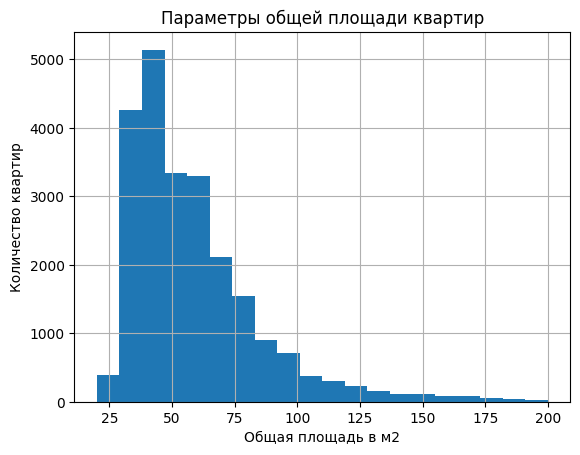

In [56]:
#создадим гистограмму
plt.hist(data['total_area'], bins=20, range=(20,200))
plt.title('Параметры общей площади квартир')
plt.xlabel('Общая площадь в м2')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

In [57]:
#рассмотрим параметр жилой площади - `living_area`

#посмотрим на описание столбца
print(data['living_area'].describe())
print()
print('Квартиры с самой маленькой жилой площадью:')
print(data['living_area'].sort_values().head(10))
print()
print('Квартиры с самой большой жилой площадью:')
print(data['living_area'].sort_values(ascending=False).head(10))

count    23254.000000
mean        33.243503
std         17.220048
min          2.000000
25%         18.400000
50%         30.300000
75%         42.200000
max        164.700000
Name: living_area, dtype: float64

Квартиры с самой маленькой жилой площадью:
13808    2.0
23378    3.0
3214     3.0
21764    5.4
16305    6.0
19098    6.5
20828    8.0
23015    8.0
114      8.3
2292     8.4
Name: living_area, dtype: float64

Квартиры с самой большой жилой площадью:
21501    164.7
22712    159.6
9317     150.8
11707    147.2
20103    147.0
11345    147.0
18640    145.4
16073    145.0
22235    145.0
14492    145.0
Name: living_area, dtype: float64


In [58]:
#уберем строки с редкими и аномальными значениями
data = data.query('living_area <= 100 and living_area >= 10')

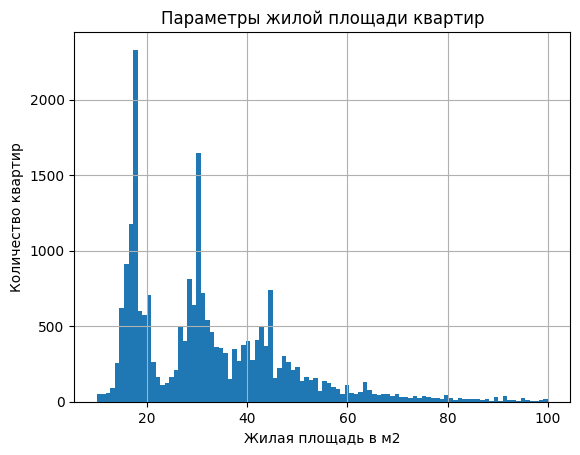

In [59]:
#создадим гистограмму
plt.hist(data['living_area'], bins=100, range=(10,100))
plt.title('Параметры жилой площади квартир')
plt.xlabel('Жилая площадь в м2')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

In [60]:
#рассмотрим параметр площади кухни - `kitchen_area`

#посмотрим на описание столбца
print(data['kitchen_area'].describe())
print()
print('Квартиры с самой маленькой площадью кухни:')
print(data['kitchen_area'].sort_values().head(10))
print()
print('Квартиры с самой большой площадью кухни:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

count    23054.000000
mean        10.196455
std          5.091814
min          0.000000
25%          7.200000
50%          9.010000
75%         11.300000
max         93.200000
Name: kitchen_area, dtype: float64

Квартиры с самой маленькой площадью кухни:
18402    0.0
7226     0.0
10944    0.0
507      0.0
23247    0.0
17555    0.0
19888    0.0
11612    0.0
12316    0.0
12595    0.0
Name: kitchen_area, dtype: float64

Квартиры с самой большой площадью кухни:
16113    93.2
16666    93.0
10777    87.2
4357     77.0
14533    75.0
16517    72.0
22787    65.0
15658    64.0
17771    64.0
19345    64.0
Name: kitchen_area, dtype: float64


In [61]:
#уберем строки с редкими и аномальными значениями
data = data.query('kitchen_area <= 35')

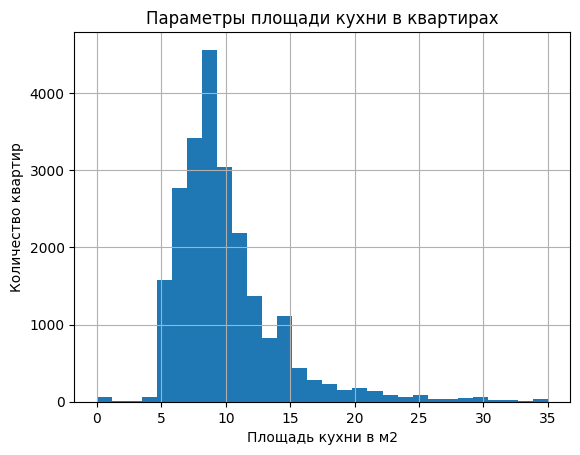

In [62]:
#создадим гистограмму
plt.hist(data['kitchen_area'], bins=30, range=(0, 35))
plt.title('Параметры площади кухни в квартирах')
plt.xlabel('Площадь кухни в м2')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

In [63]:
#рассмотрим параметр цена объекта - `last_price`

#посмотрим на описание столбца
print(data['last_price'].describe())
print()
print('Квартиры с самой маленькой стоимостью:')
print(data['last_price'].sort_values().head(10))
print()
print('Квартиры с самой большой стоимостью:')
print(data['last_price'].sort_values(ascending=False).head(10))

count    2.289500e+04
mean     5.779455e+06
std      5.165506e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.550000e+06
max      2.892384e+08
Name: last_price, dtype: float64

Квартиры с самой маленькой стоимостью:
17321    430000
14800    430000
16148    440000
17536    450000
16093    450000
5650     450000
9502     450000
18717    470000
21733    470000
23289    470000
Name: last_price, dtype: int64

Квартиры с самой большой стоимостью:
22642    289238400
4954     124000000
16461     98000000
11952     86738800
11337     85000000
10276     83820000
6407      82000000
6756      79000000
5187      77612080
15605     77349000
Name: last_price, dtype: int64


In [64]:
#уберем строки с редкими и аномальными значениями
data = data.query('last_price >= 500000 and last_price <= 20000000')

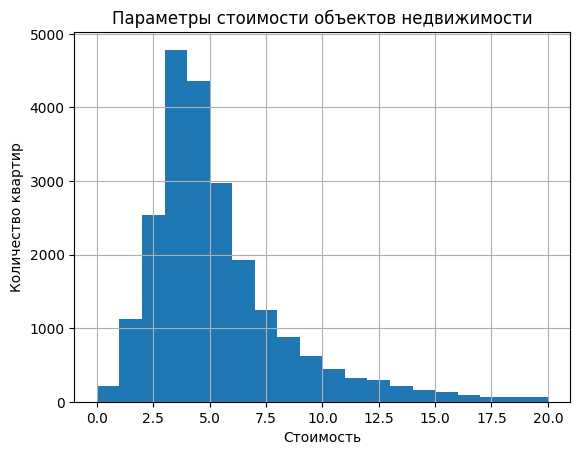

In [65]:
#создадим гистограмму
plt.hist(data['last_price'] / 1000000, bins=20, range=(0,20))
plt.title('Параметры стоимости объектов недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

In [66]:
#рассмотрим параметр количество комнат - `rooms`

#посмотрим на описание столбца
print(data['rooms'].describe())
print()
print('Квартиры с самым маленьким количеством комнат:')
print(data['rooms'].sort_values().head(10))
print()
print('Квартиры с самым большим количеством комнат:')
print(data['rooms'].sort_values(ascending=False).head(10))
print()
print(data['rooms'].value_counts())

count    22504.000000
mean         1.999289
std          0.932795
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Квартиры с самым маленьким количеством комнат:
10198    0
11239    0
11612    0
10518    0
19761    0
17683    0
12595    0
17589    0
6417     0
1563     0
Name: rooms, dtype: int64

Квартиры с самым большим количеством комнат:
17849    7
851      7
23359    7
11316    6
12391    6
20099    6
3286     6
3296     6
21941    6
10115    6
Name: rooms, dtype: int64

1    7972
2    7802
3    5506
4     962
5     183
0      57
6      19
7       3
Name: rooms, dtype: int64


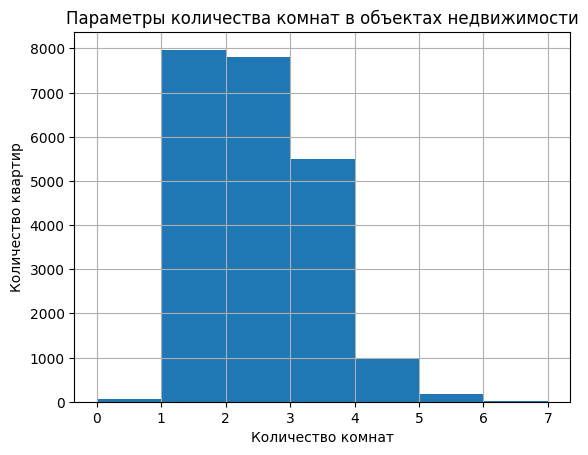

In [67]:
#создадим гистограмму
plt.hist(data['rooms'], bins=7, range=(0, 7))
plt.title('Параметры количества комнат в объектах недвижимости')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

In [68]:
#рассмотрим параметр высоты потолков - `ceiling_height`

#посмотрим на описание столбца
print(data['ceiling_height'].describe())
print()
print('Квартиры с самыми назкими потолками:')
print(data['ceiling_height'].sort_values().head(10))
print()
print('Квартиры с самыми высокими потолками:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

count    22504.000000
mean         2.711902
std          1.008189
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Квартиры с самыми назкими потолками:
22403    1.00
5663     1.20
16803    1.75
19176    2.00
16753    2.00
2551     2.00
5801     2.00
16320    2.00
11260    2.00
4176     2.00
Name: ceiling_height, dtype: float64

Квартиры с самыми высокими потолками:
22678    100.0
22153     32.0
3121      32.0
21204     27.5
10683     27.0
20316     27.0
22745     27.0
17716     27.0
5758      27.0
4838      27.0
Name: ceiling_height, dtype: float64


В данных по высоте потолков в объектах недвижимости встречаются аномальные значения, где высота выше 20м. Можем предположить, что значения указаны без запятой и на самом деле высота составляет более 2.0м. Приведем эти значения к нормальным.

In [69]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

In [70]:
#еще раз посмотрим на описание столбца
print(data['ceiling_height'].describe())
print()
print('Квартиры с самыми назкими потолками:')
print(data['ceiling_height'].sort_values().head(10))
print()
print('Квартиры с самыми высокими потолками:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

count    22504.000000
mean         2.684903
std          0.233777
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Квартиры с самыми назкими потолками:
22403    1.00
5663     1.20
16803    1.75
16753    2.00
5801     2.00
18946    2.00
551      2.00
4176     2.00
20358    2.00
17360    2.00
Name: ceiling_height, dtype: float64

Квартиры с самыми высокими потолками:
14950    14.0
22126    10.3
22678    10.0
5813      8.3
3444      8.0
15622     8.0
17309     8.0
12532     5.3
1049      5.0
2777      4.8
Name: ceiling_height, dtype: float64


In [71]:
#уберем строки с редкими и аномальными значениями
data = data.query('ceiling_height >= 2.4 and ceiling_height <= 4')
print(data['ceiling_height'].describe())

count    22446.000000
mean         2.681373
std          0.186391
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64


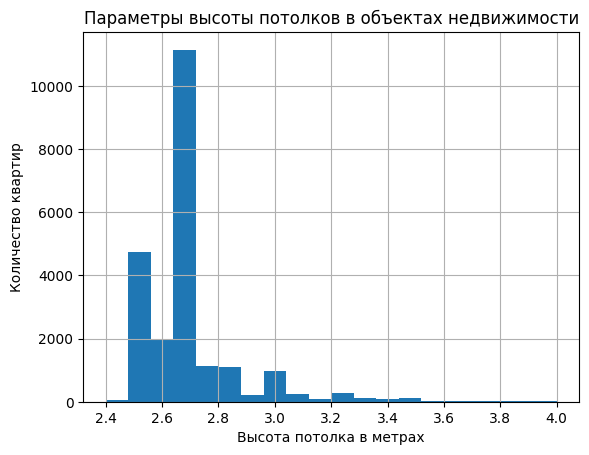

In [72]:
#создадим гистограмму
plt.hist(data['ceiling_height'], bins=20, range=(2.4, 4))
plt.title('Параметры высоты потолков в объектах недвижимости')
plt.xlabel('Высота потолка в метрах')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

другой       16478
последний     3152
первый        2816
Name: floor_category, dtype: int64


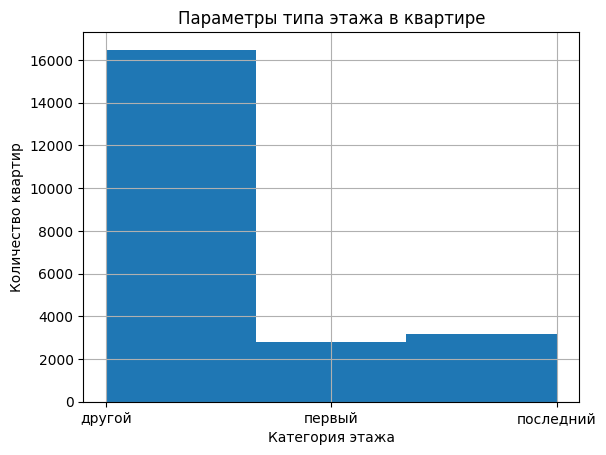

In [73]:
#рассмотрим параметр тип этажа квартиры («первый», «последний», «другой») - `floor_category`

print(data['floor_category'].value_counts())
#создадим гистограмму
plt.hist(data['floor_category'], bins=3)
plt.title('Параметры типа этажа в квартире')
plt.xlabel('Категория этажа')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

In [74]:
#рассмотрим параметр общего количества этажей в доме - `floors_total`

#посмотрим на описание столбца
print(data['floors_total'].describe())
print()
print('Квартиры с самым маленьким количеством этажей в доме:')
print(data['floors_total'].sort_values().head(10))
print()
print('Квартиры с самым большим количеством этажей в доме:')
print(data['floors_total'].sort_values(ascending=False).head(10))

count    22446.000000
mean        10.749889
std          6.611323
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Квартиры с самым маленьким количеством этажей в доме:
16889    1
10727    1
5254     1
11653    1
3050     1
9440     1
7899     1
14725    1
15428    1
19436    1
Name: floors_total, dtype: int64

Квартиры с самым большим количеством этажей в доме:
2237     60
16600    52
5758     36
397      36
10988    36
21424    35
14237    35
21631    35
15859    35
7177     35
Name: floors_total, dtype: int64


In [75]:
#уберем строки с редкими и аномальными значениями
data = data.query('floors_total >= 1 and floors_total <= 30')

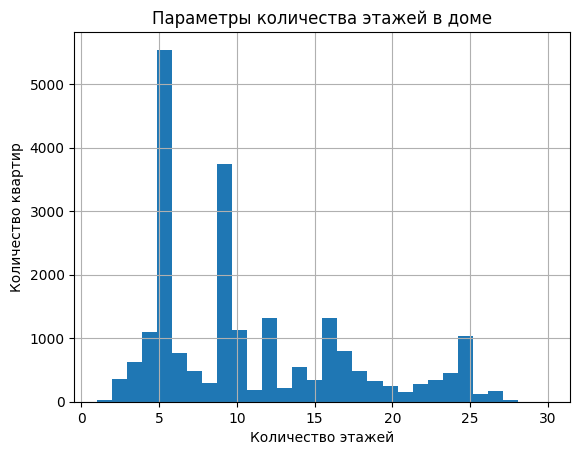

In [76]:
#создадим гистограмму
plt.hist(data['floors_total'], bins=30, range=(1,30))
plt.title('Параметры количества этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

In [77]:
#рассмотрим параметр расстояния до центра города в метрах - `city_centers_nearest`

#посмотрим на описание столбца
print(data['city_centers_nearest'].describe())
print()
print('Квартиры с самым близким расположением к центру города:')
print(data['city_centers_nearest'].sort_values().head(10))
print()
print('Квартиры с самым дальним расположением к центру города:')
print(data['city_centers_nearest'].sort_values(ascending=False).head(10))

count    17026.000000
mean     14597.817514
std       8573.534656
min        208.000000
25%      10003.750000
50%      13322.000000
75%      16478.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Квартиры с самым близким расположением к центру города:
1175     208.0
8547     215.0
1922     287.0
21857    329.0
8610     376.0
8176     387.0
2587     399.0
9412     410.0
5470     467.0
2963     467.0
Name: city_centers_nearest, dtype: float64

Квартиры с самым дальним расположением к центру города:
9561     65968.0
5293     65952.0
576      65764.0
20580    65105.0
5173     64857.0
18734    62706.0
2949     62454.0
16440    61495.0
22930    60223.0
4404     59626.0
Name: city_centers_nearest, dtype: float64


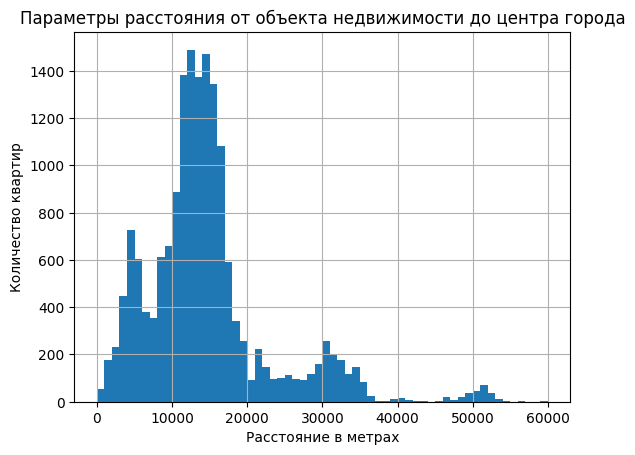

In [78]:
#создадим гистограмму
plt.hist(data['city_centers_nearest'], bins=60, range=(0,60000))
plt.title('Параметры расстояния от объекта недвижимости до центра города')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

In [79]:
#рассмотрим параметр расстояние до ближайшего парка - `parks_nearest`

#посмотрим на описание столбца
print(data['parks_nearest'].describe())
print()
print('Квартиры с самым близким расположением к ближайшим паркам:')
print(data['parks_nearest'].sort_values().head(10))
print()
print('Квартиры с самым дальним расположением к ближайшим паркам:')
print(data['parks_nearest'].sort_values(ascending=False).head(10))

count    7356.000000
mean      494.057776
std       342.046051
min         1.000000
25%       289.000000
50%       456.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Квартиры с самым близким расположением к ближайшим паркам:
14513     1.0
11856     3.0
22748     4.0
9269      7.0
2507      9.0
20033     9.0
214      10.0
21595    10.0
15183    10.0
7725     10.0
Name: parks_nearest, dtype: float64

Квартиры с самым дальним расположением к ближайшим паркам:
10869    3190.0
19277    3190.0
1579     3064.0
19055    3013.0
22887    2984.0
2636     2905.0
1848     2888.0
7792     2880.0
3834     2847.0
21824    2768.0
Name: parks_nearest, dtype: float64


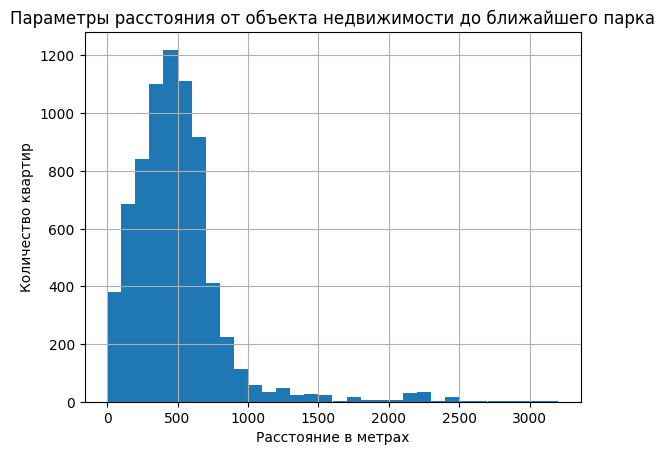

In [80]:
#создадим гистограмму
plt.hist(data['parks_nearest'], bins=32, range=(0,3200))
plt.title('Параметры расстояния от объекта недвижимости до ближайшего парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

**Выводы**  

**Общая площадь**  
Убрали аномальные значения общей площади объектов недвижимости и оставили пределы от 20 до 200 м2.
Наибольшее количество квартир с площадью от 30 до 45 м2. Свыше 100м2 количество очень маленькое.  

**Жилая площадь**  
Избавились от аномальных значений и оставили данные по жилой площади в пределах от 10 до 100м2. Самое большие количество квартир с жилой площадью 18 и 32м2. Квартир с жилой площадью более 80м2 крайне мало.  

**Площадь кухни**  

Из данных с параметрами площади кухни убрали аномальные и редкие значения, оставили площадь кухни до 35м2 включительно. Больше всего представлено объявлений с квартирами, где площадь кухни составляет от 8м2 до 9м2.
Единичные значения - от 0м2 до 5м2 и от 25м2 и более.

**Цена объекта**  

Впервую очередь избавились от редких значений. в диапазоне стоимости оставили квартиры от 500 000 руб. (так как квартиры с подобной стоимостью могут находится где-нибудь в селах и деревнях) до 20 000 000 руб..
Больше всего квартир представлено в ценовой категории от 3 до 5 миллионов рублей. Квартир, стоимость более 10 миллионов представлено очень немного.

**Количество комнат**  

Самое большое количество объявлений представлено с однокомнатными (7945 объявлений) и двухкомнатными (7770) квартирами. Объектов, которые включают в себя 6 и более комнат, - всего несколько десятков. Объекты с таким большим количеством комнат скорее всего являются домами. Квартир студий, где указано 0 комнат, также всего несколько десятков. Статистика по количеству комнат соответствует статистика по общей площади: больше всего объявлений квартир площадью 30 до 45 м2, что как раз соответсвует площадям 1- и 2-комнатной квартир.

**Высота потолков** 

Из данных по высоте потолков в квартирах были убраны аномальные и редкие значения. В выборке оставили диапазон от 2.4м (минимальная высота потолка жилья в России) до 4м. Самое больше количество объявлений, где высота потолка объекта составляет 2.65-2.7м, что является стандартным значением для большинства объектов недвижимости. Квартир с высотой потолка более 3.5м единицы.

**Тип этажа квартиры («первый», «последний», «другой»)**  

Больше всего объектов недвижимости представлено в промежутке между первым и последним этажами: 16512 квартир.
На последнем этаже находятся 3118 квартир и на первом - 2816. 

**Общее количество этажей в доме**  

Избавились от аномальных значений и оставили выборку по этажам от 1 до 30 включительно. Больше всего домов с этажностью 5 и 9 этажей. Домов, в которых более 25 этажей, - это единичные случаи.


**Расстояние до центра города в метрах**  

Больше всего квартир располагаются от центра в 11000 - 17000м. Квартир, которые расположены далее 36000м от центра очень мало, но на гистограмме наблюдается небольшой "всплеск" среди квартир с удаленность от центра 48000 - 53000м.
Возможно там расположен какой-либо населенный пункт. 

**Расстояние до ближайшего парка**  

Большее количества представленных в данных квартир располагаются в 300 - 600 метрах от ближайших парков. Максимальная удаленность от парка лишь у нескольких квартир - 3190 метров. Объектов с удаленностью бол 1500м в выборке крайне мало.


### Анализ сроков продажи квартир

Изучим, как быстро продавались квартиры с помощью столбца `days_exposition`, так как в нем указано, сколько дней было размещено каждое объявление.

In [81]:
#взглянем на значения в days_exposition
data['days_exposition'].value_counts()

9999.0    2888
45.0       861
60.0       532
7.0        226
30.0       197
          ... 
1345.0       1
994.0        1
671.0        1
1071.0       1
1174.0       1
Name: days_exposition, Length: 1118, dtype: int64

In [82]:
#избавимся от аномальных значений в колонке days_exposition
data = data.query('days_exposition != 9999')

In [83]:
#взглянем на значения в days_exposition
data['days_exposition'].value_counts()

45.0      861
60.0      532
7.0       226
30.0      197
4.0       170
         ... 
1345.0      1
994.0       1
671.0       1
1071.0      1
1174.0      1
Name: days_exposition, Length: 1117, dtype: int64

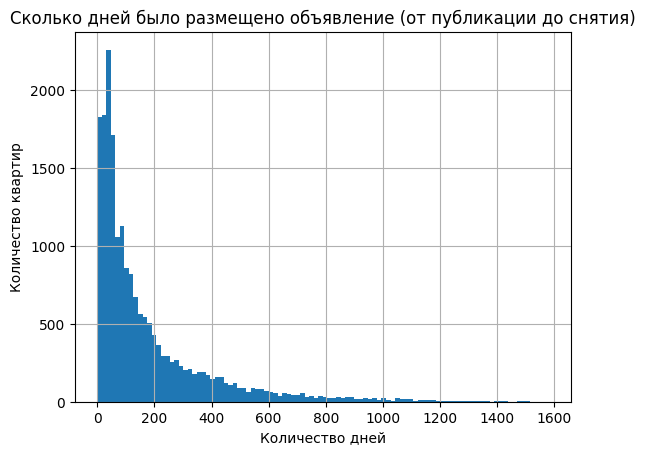


Медианное значение дней продажи: 93.0

Среднее значение дней продажи: 177.0


In [84]:
#построим гистограмму
plt.hist(data['days_exposition'], bins=100, range=(0,1580))
plt.title('Cколько дней было размещено объявление (от публикации до снятия)')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()
print()
#найдем медианное и среднее значения
print('Медианное значение дней продажи:', data['days_exposition'].median())
print()
print('Среднее значение дней продажи:', data['days_exposition'].mean().round())

In [85]:
#посмотрим на характерные значения
data['days_exposition'].describe()

count    19528.000000
mean       177.060836
std        215.641337
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод**

Медианное значение количества дней, за которое продаются объекты недвижимости - 93.  
Среднее значение количества дней, за которое продаются объекты недвижимости - 177.  
В основном продажи совершаются примерно за 3 месяца. Быстрые продажи проходили за срок менее 44 дней (1,5 месяца) после публикации. Длительные продажи осуществлялись сроком более 225 дней (7,5 месяцев).

Есть пиковые значения в районе 45 и 60 дней. Вероятно, это связано с условиями сервиса о сроках снятия объевлений с публикации. Для продажи квартир стоимостью до 4,5 млн - это 45 дней и для квартир стоимостью от 4,5 до 10 млн — 60 дней. Так как в этом ценовом диапазоне больше всего объявлений и, если они автоматом снимаются с публикации и причина снятия никак не фиксируется в сервисе (продажа или истек срок и т.д.), то любое снятое объявление считается за то, что квартира была продана. Здесь логично было бы дать рекомендацию разработчикам о 
выявлении причин снятия объявлений с публикации в момент самого снятия.

Есть продажи, которые были осуществены всего за несколько дней. Можно предположить, что владельцы объявлений сняли их с публикации по какой-либо причине без фактического осуществления продажи.  

Среди длительных продаж есть объявления, где объекты продавались сроком от 1 до 3 лет, а также единичные объявления с длительностью продажи от 3 до 4,3 лет.

### Анализ факторов, влияющих на общую стоимость жилья

Проанализируем факторы, которые могут влиять на общую (полную) стоимость объекта недвижимости - `total`. Для этого построим визуалзации по каждому из параметров - *общая площадь, жилая площадь, площадь кухни, количества комнат, этаж, на котором расположена квартира (первый, последний, другой), дата размещения (день недели, месяц, год)*.

**Общая площадь**

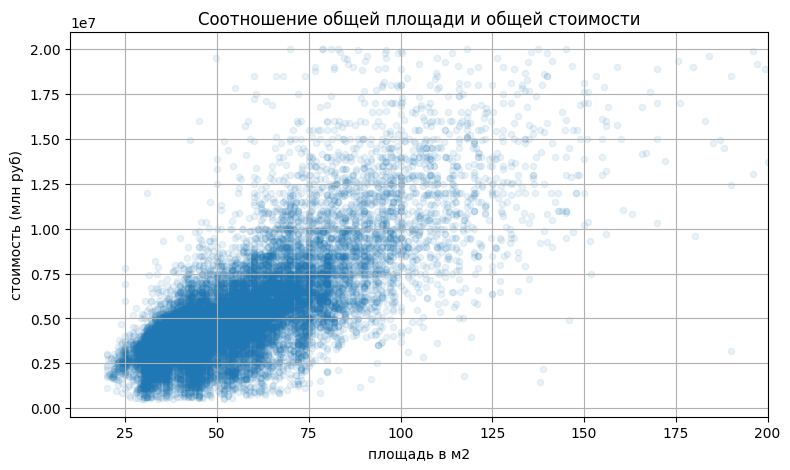

Коэффицинет корреляции между общей площадью и общей стоимостью: 0.7587853467244322


In [86]:
#создадим график с соотношением общей площади и общей стоимости жилья
data.plot(title='Соотношение общей площади и общей стоимости', kind='scatter', alpha=0.09, y='last_price', \
x='total_area', xlabel='площадь в м2', ylabel='стоимость (млн руб)', style='o', xlim=(10,200), grid=True, \
figsize=(9, 5))

plt.show()
#найдем коэффициент корреляции
print('Коэффицинет корреляции между общей площадью и общей стоимостью:', data['total_area'] \
.corr(data['last_price']))

**Жилая площадь**

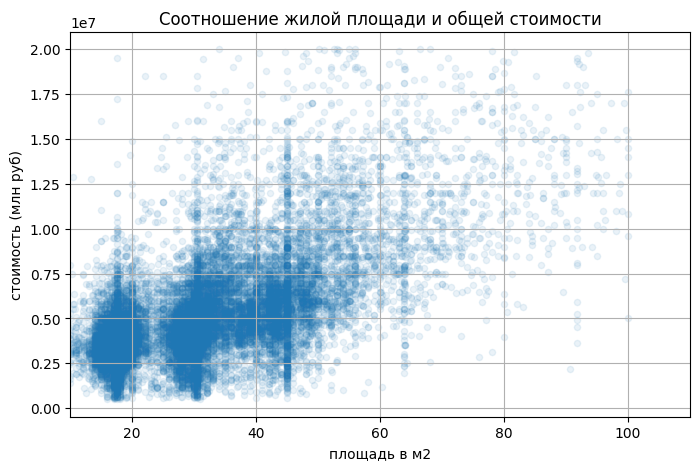

Коэффицинет корреляции между жилой площадью и общей стоимостью: 0.6257456861169852


In [87]:
#создадим график с соотношением общей площади и общей стоимости жилья
data.plot(title='Соотношение жилой площади и общей стоимости', kind='scatter', alpha=0.09, y='last_price', \
x='living_area', xlabel='площадь в м2', ylabel='стоимость (млн руб)', style='o', xlim=(10,110), grid=True, \
figsize=(8, 5))

plt.show()
#найдем коэффициент корреляции
print('Коэффицинет корреляции между жилой площадью и общей стоимостью:', data['living_area'] \
.corr(data['last_price']))

**Площадь кухни**

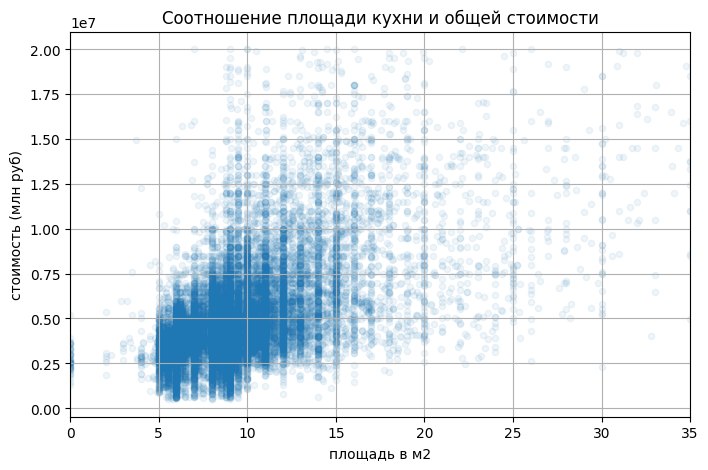

Коэффицинет корреляции между площадью кухни и общей стоимостью: 0.535322711213997


In [88]:
#создадим график с соотношением площади кухни и общей стоимости жилья
data.plot(title='Соотношение площади кухни и общей стоимости', kind='scatter', alpha=0.07, y='last_price', \
x='kitchen_area', xlabel='площадь в м2', ylabel='стоимость (млн руб)', style='o', xlim=(0,35), grid=True, \
figsize=(8, 5))

plt.show()
#найдем коэффициент корреляции
print('Коэффицинет корреляции между площадью кухни и общей стоимостью:', data['kitchen_area'] \
.corr(data['last_price']))

**Количество комнат**

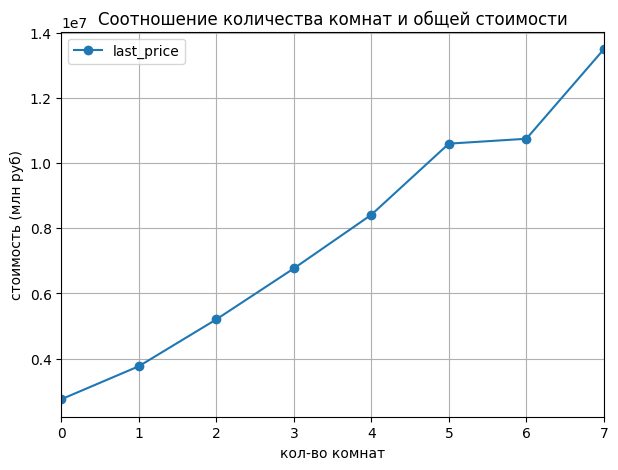

Коэффицинет корреляции между количеством комнат и общей стоимостью: 0.48480964254438913


In [89]:
#создадим сводную таблицу и график с соотношением количества комнат и общей стоимости жилья
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(title='Соотношение количества комнат и общей стоимости', \
          xlabel='кол-во комнат', ylabel='стоимость (млн руб)', style='o-', xlim=(0,7), grid=True, figsize=(7, 5))

)
plt.show()
#найдем коэффициент корреляции
print('Коэффицинет корреляции между количеством комнат и общей стоимостью:', data['rooms'].corr(data['last_price']))

**Этажность - первый, последний, другой**

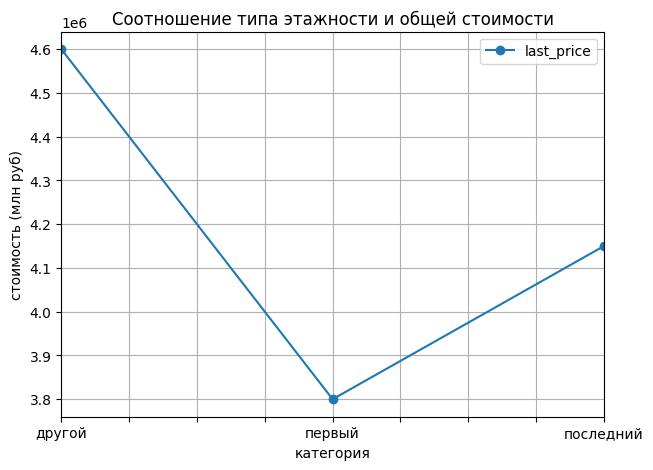

In [90]:
#создадим сводную таблицу и график с соотношением типа этажа и общей стоимости жилья
(
    data.pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(title='Соотношение типа этажности и общей стоимости', \
    xlabel='категория', ylabel='стоимость (млн руб)', style='o-', xlim=(0,2), grid=True, figsize=(7, 5))
)
plt.show()

**День недели размещения**

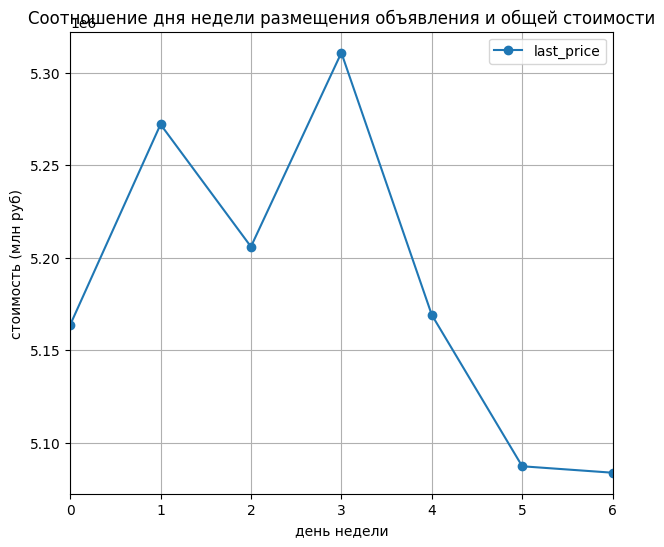

In [91]:
#создадим сводную таблицу и график с соотношением дня недели, в который было размещено объявление, и
#общей стоимости жилья
(
    data.pivot_table(index='exposition_weekday', values='last_price')
    .plot(title='Соотношение дня недели размещения объявления и общей стоимости', \
    xlabel='день недели', ylabel='стоимость (млн руб)', style='o-', xlim=(0,6), grid=True, figsize=(7, 6))
)
plt.show()

**Месяц размещения**

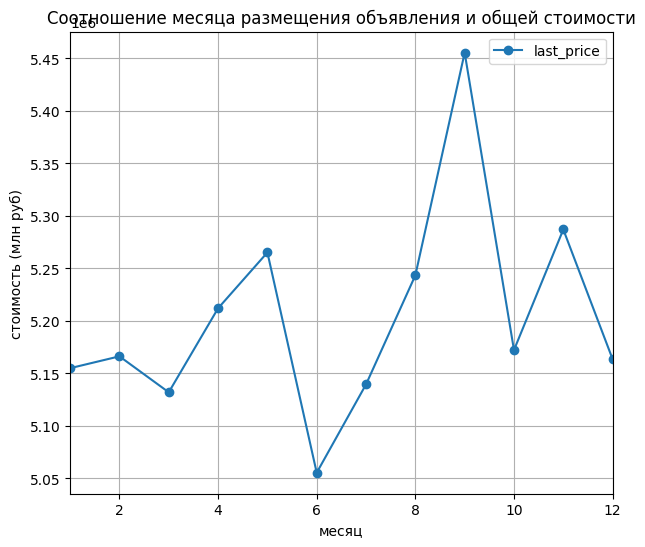

In [92]:
#создадим сводную таблицу и график с соотношением месяца, в который было размещено объявление, и
#общей стоимости жилья
(
    data.pivot_table(index='exposition_month', values='last_price')
    .plot(title='Соотношение месяца размещения объявления и общей стоимости', \
    xlabel='месяц', ylabel='стоимость (млн руб)', style='o-', xlim=(1,12), grid=True, figsize=(7, 6))
)
plt.show()

**Год размещения**

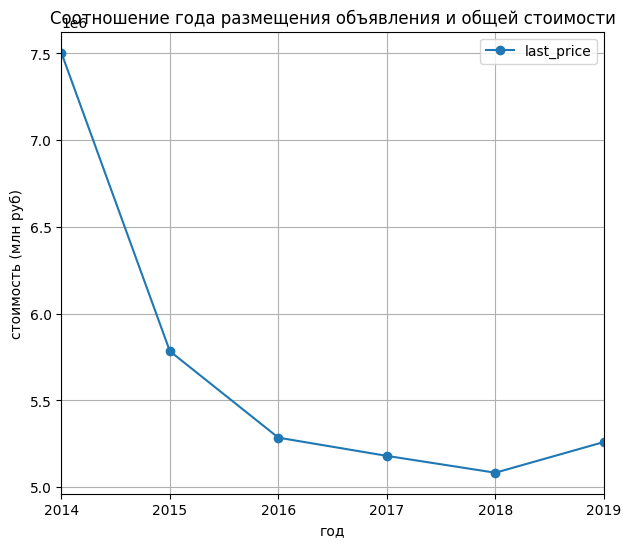

In [93]:
#создадим сводную таблицу и график с соотношением месяца, в который было размещено объявление, и
#общей стоимости жилья
(
    data.pivot_table(index='exposition_year', values='last_price')
    .plot(title='Соотношение года размещения объявления и общей стоимости', \
    xlabel='год', ylabel='стоимость (млн руб)', style='o-', xlim=(2014,2019), grid=True, figsize=(7, 6))
)
plt.show()

**Вывод**  

**Общая площадь**  

**Площадь жилья влияет на его стоимость** - об этом говорит коэффициент корреляции. Хотя вероятно площадь может не всегда влиять на цену в случае с вторичным жильем и дальностью расположения, иначе коэффициент корреляции был бы от 0,90 до 1, а не 0,75. То есть, 3-комнатная квартира в отдаленном населенном пункте будет стоить дороже студии или 1-комнатной квартиры, которая находится ближе к Санкт-Петербургу. Или квартира в Ленинградской области в новом жк также не будет стоить дороже такой же по площади квартиры, расположенной в центре Санкт-Петербурга.

**Жилая площадь**  

Как и в соотношении общей площади и стоимости жилья, **корреляция цены и жилой площади не слишкой высокая**, хотя она безусловно может присутствовать в некоторых случаях при определенных условиях.

**Площадь кухни**  

Аналогично, как и в зависимости общей площади и жилой площади от стоимости, **соотношение площади кухни и стоимости объекта недвижимости не слишком высокое**. Оно также может присутствовать при определнных параметрах, но при этом коэффициант корреляции площади кухни к стоимости гораздно ниже, чем коэффициент корреляции площади кухни и стоимости. Кухня - это не самый важный параметр, по которому покупатели оценивают недвижимость.

**Количество комнат**  

**Рост цены прямопропорционален количеству комнат** в объектах недвижимости. Хотя 5- и 6-комнатные квартиры держатся на одному уровне ценовой категории.

**Этажность - первый, последний, другой**  

Стоимость объектов недвижимости, находящихся не **на первом и не на последнем этажах в разы выше** двух других категорий. Цена на жилье **на первом этаже**, очевидно, **самая низкая**, так как люди предпочитают не покупать квартиры на первом этаже по ряду причин: небезопасно, шумно, внизу находятся подвальные помещения, откуда может идти сырость, плесень и насекомые, в окна заглядывают прохожие и т.д.. Жилье **на последних этажах** зданий по стоимости **выше**, чем жилье на первом из-за хорошего обзора, вида и это наиболее тихие этажи, но есть нюанс в том, что крыша может протечь или коммунальщики зимой будут чистить крышу и стучать, поэтому цена квартир на последних этажах не завышена.

**День недели размещения**  

В **четверг** цена на недвижимость достигает пика и резко падает к **выходным**.

**Месяц размещения**  

В течение года от месяца к месяцу цена на недвижимость колеблется не сильно. Но **в июне стоимость на жилье резко падает**, что вероятнее всего связано с началом летнего сезона, когда люди предпочитают потратить деньги на отпуск и отдохнуть, а не заниматься покупкой и оформлением недвижимости. При этом **к сентябрю происходит резкий скачек в цене**, что может быть связано с началом учебного сезона, так как, например, семьям с детьми удобно переехать и устроить детей в школу/садик к сентябрю.

**Год размещения**

**Стоимость жилья очевидно коррелирует с годом публикации**, так как средняя цена на жилье в 2014 году достигала 7.5 млн, а в 2015 году резко упала ниже 6 млн и продолжала падать вплоть до 2018 года. Это поведение можно объяснить тем, что после в 2014 году курс доллара вырос в 2 раза, поэтому спрос и цена на жилье упали.


### Анализ стоимости одного квадратного метра

Изучим стоимость одного квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений.

In [94]:
#создадим сводную таблицу, где сгруппируем объявления по населенным пунктам и 
#просчитаем медианное значение стоимости за один м2 по каждому населенному пункту

#найдем топ-10 населенных пунктов по самом большому количеству размещенных объявлений
top_ten_locations = data['locality_name'].value_counts().head(10)
#создадим сводную таблицу, из топ-10 населенных пунктов, которые нашли ранее,
#в которой выведем среднюю стоимость за м2 по каждому их населенных пунктов 
top_ten_avg_price = (
    data.query('locality_name in (@top_ten_locations.index)')
    .pivot_table(values='one_sq_meter_price', index='locality_name')
    .round(2)
)
#выведем таблицу на экран, отсортировав по убыванию средней стоимости за м2
top_ten_avg_price.sort_values(by='one_sq_meter_price', ascending=False)

,one_sq_meter_price
locality_name,
Санкт-Петербург,106944.84
Пушкин,100773.97
Кудрово,94311.87
поселок Парголово,89742.42
поселок Мурино,85221.14
поселок Шушары,77789.68
Колпино,74763.34
Гатчина,67901.32
Всеволожск,66754.93


**Вывод**  

*Населенные пункты с самой дорогой недвижимостью*   

* очевидно, что самая высокая стоимость жилья в столице -  **Санкт-Петербурге**. Там средняя стоимость за один м2 достигает почти 107000 руб.  
* город **Пушкин** является историческим районом Ленинградской области, так как это бывшее царское село. Поэтому стоимость недвижимосту здесь за м2, как и в Питере, превышает 100000 руб. за м2.
* **Кудрово** является одним из первых миллионников в пригороде, находящихся в самой близости к Санкт-Петербургу (в 2км находится станция метро). Очень пользуется популярностью среди желающих купить жилье уже долгое время. Новые ЖК не перестают там строить, а инфраструктура улучшаться, поэтому наличие высокого ценника не удивительно.  
* **поселок Парголово** находится в Выборгском районе Ленинградской области. Там ходится большое количество природных зон, исторический усадеб. Также в Парголово строится элитный жилой комплекс.  
* **поселок Мурино** - один из самых активно застраивающихся ЖК районов Ленинградской области, находится рядом с метро «Девяткино» и граничит с КАДом. Район не считается безопасным, считается густонаселенным и одним из самых не пригодных для жилья с множеством "человейников". Но, привсем при этом, имеет далеко не самый низкий ценник на жилье.  
* **поселок Шушары** является районом с историей, застраивается новыми жилыми высотными домами. Также в поселке активно развивают инфраструктуру - стоятся дет. сады, поликлиники и т.д..   
* **Колпино** - спокойный город с историческим прошлым и больших количеством достопримечательносте в относительной близости от Санкт-Петербурга - 20-30мин на машине.
* **Гатчина** является одним из самых красивых районов области, но располагается в 45 км от СПб. Поэтому стоимость недвижимости ниже тут, чем в том же Мурино.  
* **Всеволожск** - старинный город с множеством достопремичательностей. Имеет не самый высокий ценник на жилье, сравнимый с Гатчиной - 66754.93руб за м2. 
* **Выборг** - один из самых красивых городов, расположен на берегу Финского залива, достаточно крупный. Но отдаленность от Питера достаточно большая: дорога на автобусе до Питера занимает 2 с лишним часа. По всей видимости это является причиной самого дешевого ценника на жилье в Выборге среди топ-10 городов по количеству опубликованных объявлений.



### Анализ объектов недвижимости в пределах Санкт-Петербурга

Изучим среднюю стоимость объектов недвижимости в пределах Санкт-Петербурга, исходя из их удаленности от центра города. Найдем и проанализируем цену по каждому километру удаленности.

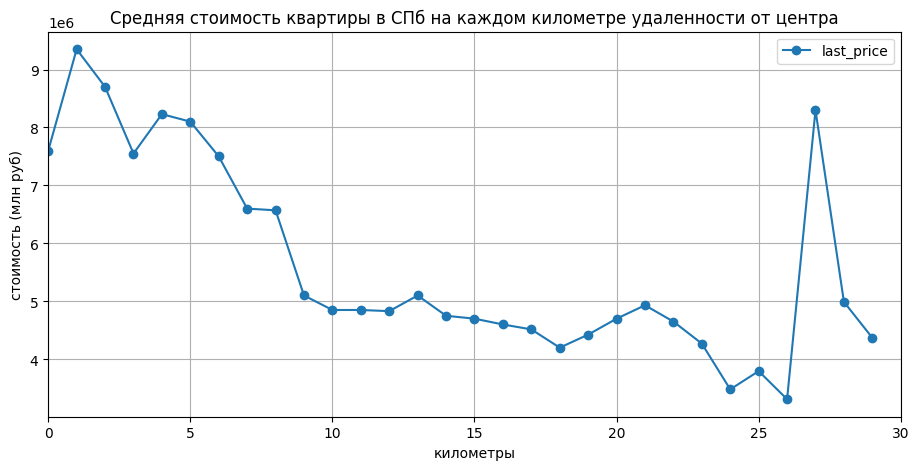

In [95]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='median')
    .plot(title='Средняя стоимость квартиры в СПб на каждом километре удаленности от центра', \
          xlabel='километры', ylabel='стоимость (млн руб)', style='o-', xlim=(0,30), grid=True, figsize=(11, 5))

)
plt.show()

**Вывод**  

Самые дорогие объекты недвижимости находятся в радиусе 1км от центра Санкт-Петербурга, что ожидаемо. Объекты до 8км от самого центр стоят свыше 6.5 млн руб., а после 8 км ценник на недвижимость резко падает более, чем 1.5 млн. Хотя на 13-ом и 21-ом км удаленности от центра есть маленькие всплески в стоимости. Возможно это связано с тем, что там строятся новые ЖК с хорошей инфраструктурой. На 27км удаленности от центра видем резкий подъем цены до более 8 млн, что сравнимо только с недвижимостью в паре километров от центра. Можем предположить, что в примерно 27км от центра находится какой-либо исторический, элитный район, в котором, не смотря на удаленность от центра, недвижимость очень дорогая и престижная.

# Итоги исследования 

## Общий вывод

Прежде чем преступить к исследовательскому анализу была проведена **предобработка данных**, в ходе которой:  
- все столбцы были преведены к единому правильному стилю;  
- были заполнены пропуски во всех колонках, где это было возможно сделать (не удалось заполнить пропуски только в 4 колонках - удаленность от аэропорта, удаленность от центра города, расстояние до ближайшего парка и расстояние до ближайшего водоема);  
- был изменен тип данных в некоторых столбцах;  
- были устранены явные и неявные дубликаты.  

Далее, для полноценного анализа данных были **добавлены новые колонки** в датасет: *цена одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления,
тип этажа квартиры (значения — «‎первый», «последний», «другой»), расстояние до центра города в км.**  

В ходе **исследовательского анализа данных** по недвижимости была проделана работа:


1. Изучены и проанализированны параметры, которые важны для оценки стоимости объектов недвижимости:
* общая площадь  
* жилая площадь  
* площадь кухни  
* цена объекта  
* количество комнат  
* высота потолков  
* тип этажа квартиры («первый», «последний», «другой»)  
* общее количество этажей в доме  
* расстояние до центра города в метрах  
* расстояние до ближайшего парка  

В процессе изучения этих параметров тажке были исключены аномальные, редкие и выпадающие значения.

2. Проведен анализ сроков продажи квартир с момента размещения объявления на ресурсе.  


3. Проведен анализ ряда факторов, влияющих на ценообразование объектов недвижимости. Для этого были взяты следующие факторы:
* общая площадь  
* жилая площадь  
* площадь кухни  
* количество комнат  
* этажность - первый, последний, другой  
* день недели размещения  
* месяц размещения  
* год размещения  

Эти факторы были соотнесены с общей стоимостью объектов для нахождения зависимостей и коэффициента корреляции.

4. Проведен анализ стоимости одного квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений.  


5. Проведен анализ средней стоимости объектов недвижимости в пределах Санкт-Петербурга, исходя из их удаленности от центра города. Была рассмотрена зависимости цены от удаленности на каждом километре.  

**Выводы на основании исследования**  
Больше всего на продажу выставлено квартир 1-комнатных и 2-комнатных, площадью 30 до 45 м2, с жилой площадью 18 и 32м2 и площадью кухни 8-9м2, стоимостью от 3 до 5 миллионов рублей. Высота потолка объектов составляет как правило 2.65-2.7м. Находятся объекты не на первом и не напоследнем этажах, как правило это 5 - 9 этажи. При этом располагаются от центра в 11000 - 17000м и в 300-600 метрах от ближайшего парка.

Средний срок осуществления продажи с момента публикации объявления - 3 месяца. часть объявлений автоматически снимаются с продажи по истечению срока  публикации, согласно правилам сервиса. Об этом говорят пикив 45 и 60 дней. Наверняка узнать причину данных пиков можно при проведении дополнительного исследования.

Факторы, которые влияют на стоимость недвижимости:
1. Этажность - квартиры не на первом и не на последнем этаже самые дорогие
2. Количество комнат - чем больше комнат, тем выше цена.
3. Общая площадь - чем больше площадь, тем выше цена.
4. День недели - в четверг цена самая высокая и в субботу и воскресенье самая низкая.
5. Месяц - в июне недвижимость дешевле всего, а к сентябрю резко достигает пика.
6. Год - геополитические и внешне-/ внутриэкономические изменения, происходящие за год, меняют ситуацию с ценами на жилье.  

Площадь кухни и жилая площадь - параметры, которые слабо влияют на стоимость объектов недвижимости, хотя некоторое влияние могут оказывать, но для точного понимания, возможно, нужно проводить более глубокий анализ по влиянию данных параметров на цену.

Среди топ-10 городов Ленинградской области по количеству опубликованных объявлений, самая дорогая недвижимость, как и ожидалось, находится в Санкт-Петербурге. Средняя стоимость за один м2 достигает почти 107000 руб.

Среди того же списка топ-10 городов по количеству объявлений, самую последнюю 10 строчку по стоимости недвижимости занимает Выборг. Отдаленность Выборга от Питера достаточно большая: дорога на автобусе до Питера занимает 2 с лишним часа. По всей видимости это является причиной самого дешевого ценника на жилье среди списка топ-10 городов - 
57124 руб. за м2.  

В пределах Санкт-Петербурга цена за недвижимость напрямую зависит от удаленности от центра города. Самые дорогие дома находятся в радиусе 1км от центра Санкт-Петербурга, после 1км недвижимость постепенно падает в цене. Но в 27км от цента значение цены резко возрастает практически до стоимости недвижимости в самом центре города, на что стоит обратить внимание, так как, вероятно, там находится либо исторический, либо элитный район, где недижимость является престижной.  

*Также хочу дать пару рекомендаций разработчикам сервиса:*  
*1. Во избежание неявных дубликатов в столбце с наименованиями населенных пунктов можно предлагать пользователям название локации в выпадающих строках по введенным первым буквам в поле.*  
*2. Можно доработать момент с выявленим причины снятия объявления с публикации. В момент снятия пользователем объявления с публикации предлагать вопрос с обязательным ответом причины сняти. Если объявления снимаются по причине истечения сроков публикации объявления, то автоматически ставить пометку о том, что объывление было снято по соответствующей причине.*